In [ ]:
pip install matplotlib networkx

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

RED = 'RED'
BLACK = 'BLACK'

In [4]:
class Node:
    def __init__(self, key, color=RED, left=None, right=None, parent=None):
        self.key = key
        self.color = color
        self.left = left
        self.right = right
        self.parent = parent
        
class RedBlackTree:
    def __init__(self):
        self.NIL = Node(key=None, color=BLACK)
        self.root = self.NIL
        
    def left_rotate(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.NIL:
            y.left.parent = x
        y.parent = x.parent
        if x.parent == self.NIL:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y
        
    def right_rotate(self, y):
        x = y.left
        y.left = x.right
        if x.right != self.NIL:
            x.right.parent = y
        x.parent = y.parent
        if y.parent == self.NIL:
            self.root = x
        elif y == y.parent.left:
            y.parent.left = x
        else:
            y.parent.right = x
        x.right = y
        y.parent = x
        
    def insert(self, key):
        node = Node(key)
        node.left = self.NIL
        node.right = self.NIL
        
        y = None
        x = self.root
        
        while x != self.NIL:
            y = x
            if node.key < x.key:
                x = x.left
            else:
                x = x.right
                
        node.parent = y
        
        if y == None:
            self.root = node
        elif node.key < y.key:
            y.left = node
        else:
            y.right = node
            
        node.color = RED
        self.insert_fixup(node)
        
    def insert_fixup(self, z):
        while z.parent != None and z.parent.color == RED:
            if z.parent == z.parent.parent.left:
                y = z.parent.parent.right
                if y.color == RED:
                    z.parent.color = BLACK
                    y.color = BLACK
                    z.parent.parent.color = RED
                    z = z.parent.parent
                else:
                    if z == z.parent.right:
                        z = z.parent
                        self.left_rotate(z)
                    z.parent.color = BLACK
                    z.parent.parent.color = RED
                    self.right_rotate(z.parent.parent)
            else:
                y = z.parent.parent.left
                if y.color == RED:
                    z.parent.color = BLACK
                    y.color = BLACK
                    z.parent.parent.color = RED
                    z = z.parent.parent
                else:
                    if z == z.parent.left:
                        z = z.parent
                        self.right_rotate(z)
                    z.parent.color = BLACK
                    z.parent.parent.color = RED
                    self.left_rotate(z.parent.parent)
        self.root.color = BLACK
        
    def transplant(self, u, v):
        if u.parent == None:
            self.root = v
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        v.parent = u.parent
        
    def minimum(self, node):
        while node.left != self.NIL:
            node = node.left
        return node
    
    def delete(self, key):
        z = self.search(self.root, key)
        if z == self.NIL:
            print(f"Chave {key} não encontrada")
            return
        
        y = z
        y_original_color = y.color
        
        if z.left == self.NIL:
            x = z.right
            self.transplant(z, z.right)
        elif z.right == self.NIL:
            x = z.left
            self.transplant(z, z.left)
        else:
            y = self.minimum(z.right)
            y_original_color = y.color
            x = y.right
            if y.parent == z:
                x.parent = y
            else:
                self.transplant(y, y.right)
                y.right = z.right
                y.right.parent = y

            self.transplant(z, y)
            y.left = z.left
            y.left.parent = y
            y.color = z.color
            
        if y_original_color == BLACK:
            self.delete_fixup(x)
            
    def delete_fixup(self, x):
        while x != self.root and x.color == BLACK:
            if x == x.parent.left:
                w = x.parent.right
                if w.color == RED:
                    w.color = BLACK
                    x.parent.color = RED
                    self.left_rotate(x.parent)
                    w = x.parent.right
                if w.left.color == BLACK and w.right.color == BLACK:
                    w.color = RED
                    x = x.parent
                else:
                    if w.right.color == BLACK:
                        w.left.color = BLACK
                        w.color = RED
                        self.right_rotate(w)
                        w = x.parent.right
                    w.color = x.parent.color
                    x.parent.color = BLACK
                    w.right.color = BLACK
                    self.left_rotate(x.parent)
                    x = self.root
            else:
                w = x.parent.left
                if w.color == RED:
                    w.color = BLACK
                    x.parent.color = RED
                    self.right_rotate(x.parent)
                    w = x.parent.left
                if w.right.color == BLACK and w.left.color == BLACK:
                    w.color = RED
                    x = x.parent
                else:
                    if w.left.color == BLACK:
                        w.right.color = BLACK
                        w.color = RED
                        self.left_rotate(w)
                        w = x.parent.left
                    w.color = x.parent.color
                    x.parent.color = BLACK
                    w.left.color = BLACK
                    self.right_rotate(x.parent)
                    x = self.root
        x.color = BLACK
        
    def search(self, node, key):
        if node == self.NIL or key == node.key:
            return node
        if key < node.key:
            return self.search(node.left, key)
        else:
            return self.search(node.right, key)
        
    def inorder_helper(self, node, res):
        if node != self.NIL:
            self.inorder_helper(node.left, res)
            res.append(node.key)
            self.inorder_helper(node.right, res)

    def inorder(self):
        res = []
        self.inorder_helper(self.root, res)
        return res

    def visualize(self):
        G = nx.DiGraph()
        labels = {}
        self._add_edges(self.root, G, labels)
        pos = nx.nx_pydot.graphviz_layout(G, prog='dot')
        colors = [node[1]['color'] for node in G.nodes(data=True)]
        nx.draw(G, pos, with_labels=True, labels=labels, node_color=colors)
        plt.show()

    def _add_edges(self, node, G, labels):
        if node != self.NIL:
            G.add_node(id(node), color='red' if node.color == RED else 'black')
            labels[id(node)] = str(node.key)
            if node.left != self.NIL:
                G.add_edge(id(node), id(node.left))
                self._add_edges(node.left, G, labels)
            if node.right != self.NIL:
                G.add_edge(id(node), id(node.right))
                self._add_edges(node.right, G, labels)

Travessia em ordem:
[4, 6, 8, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 33, 35]


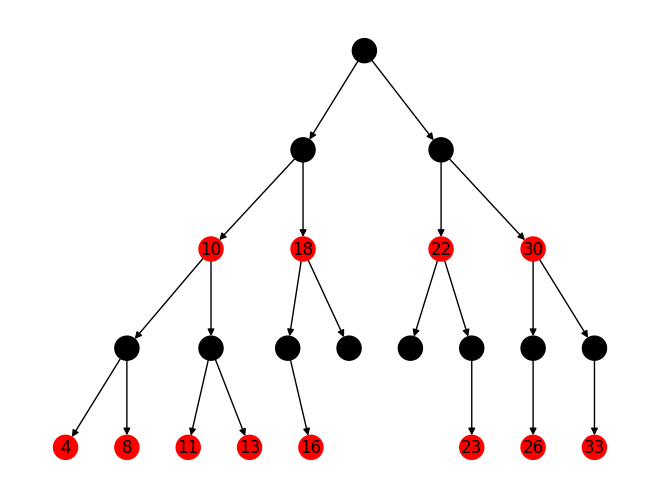

Travessia em ordem após deletar nós:
[4, 6, 8, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 28, 33, 35]


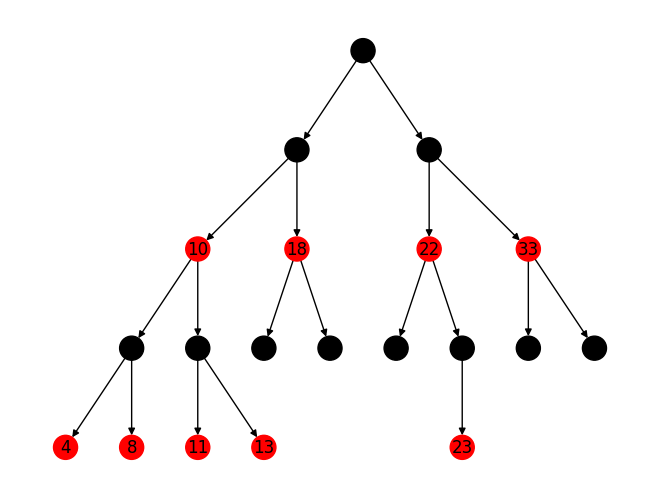

In [5]:
tree = RedBlackTree()
values = [20, 15, 25, 10, 18, 22, 30, 6, 12, 17, 19, 21, 24, 28, 35, 4, 8, 11, 13, 16, 23, 26, 33]
for val in values:
    tree.insert(val)

print("Travessia em ordem:")
print(tree.inorder())

tree.visualize()

tree.delete(15)
tree.delete(25)
tree.delete(30)

print("Travessia em ordem após deletar nós:")
print(tree.inorder())

tree.visualize()
